# Clase 3 - Regresión Logística

## Carga de Librerias

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

Para este ejemplo vamos a utilizar el Wisconsin Breast Cancer Dataset). 

Es un dataset de imagenes de celulas obtenidas de analisis de personas que sufren un posible cancer de mama.

## Ejercicio

Carga de datos

In [54]:
cancer_datos = datasets.load_breast_cancer()
pd.DataFrame(cancer_datos['data'],columns=cancer_datos['feature_names'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Se imprimen los target names y la descripcion

In [55]:
print("Descripción:")
print(cancer_datos['DESCR'])
print("Labels: ")
print(cancer_datos['target_names'])


Descripción:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0

Se crea el DataFrame

In [56]:
cancer_df = pd.DataFrame(cancer_datos["data"],columns=cancer_datos["feature_names"])
cancer_df["objetivo"] = cancer_datos["target"]
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


El dataset contiene los valores medios de ciertos parametros del núcleo de las celulas mostradas en las imágenes, así como dichos valores para la celula con características más preocupantes

**Caracteristicas del Dataset**

In [57]:
#SE IMPRIME CUANTOS VALORES SON 1 Y CUALES SON 0
print("Cantidad de casos: ")
print(cancer_df["objetivo"].value_counts(True))
#DADO QUE LOS CASOS POSITIVOS LOS MARCA SON 0, SE DEBE CAMBIAR
cancer_df["objetivo"] = cancer_df["objetivo"].replace({1:0,0:1})
#POR LO TANTO AHORA
# 0 -> NEGATIVO
# 1 -> POSITIVO

Cantidad de casos: 
1    0.627417
0    0.372583
Name: objetivo, dtype: float64


In [58]:
from sklearn.model_selection import train_test_split
#SE VA A TRABAJAR SOLO CON LA COLUMNA DE WORSTAREA, ES DECIR EXPLICAR CON UNA SOLA VARIABLE IND.
variables_entrenamiento = cancer_datos["feature_names"]
variable_objetivo = "objetivo"


Utilizando un función Logistica

In [59]:
from sklearn.linear_model import LogisticRegression
X = cancer_df[variables_entrenamiento]
y = cancer_df[variable_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

El solucionador sera **Liblinear** es para tecnicas de clasificacion de una variable categorica

In [60]:
clf = LogisticRegression(solver='liblinear')
clf.fit(X=X_train,y=y_train)
#Se hace el predict
predicciones = clf.predict(X_test)

Se observan las primeras diez predicciones

In [61]:
print(predicciones[:10])

[1 0 1 1 0 0 0 0 0 0]


In [62]:
predicciones_probailidades = clf.predict_proba(X_test)
predicciones_probailidades
pd.DataFrame(predicciones_probailidades,columns=['Prob_0','Prob_1'])

,Prob_0,Prob_1
0,5.478158e-06,0.999995
1,9.940802e-01,0.005920
2,0.000000e+00,1.000000
3,1.286371e-10,1.000000
4,9.056449e-01,0.094355
...,...,...
109,9.997719e-01,0.000228
110,4.525269e-12,1.000000
111,9.873908e-01,0.012609
112,2.195789e-02,0.978042


**Histograma**


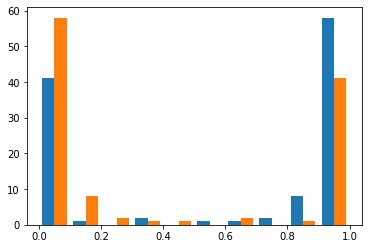

In [63]:
plt.figure()
plt.hist(predicciones_probailidades)
plt.show()

In [64]:
probs_df = pd.DataFrame(predicciones_probailidades)
probs_df


,0,1
0,5.478158e-06,0.999995
1,9.940802e-01,0.005920
2,0.000000e+00,1.000000
3,1.286371e-10,1.000000
4,9.056449e-01,0.094355
...,...,...
109,9.997719e-01,0.000228
110,4.525269e-12,1.000000
111,9.873908e-01,0.012609
112,2.195789e-02,0.978042


In [65]:
X = X_test.reset_index().copy()
X['objetivo'] = y_test.tolist()
X['prediccion'] = predicciones
X = pd.concat([X,probs_df],axis=1)
comparacion=pd.DataFrame(X[["objetivo", "prediccion", 0, 1]].head(50))
comparacion


,objetivo,prediccion,0,1
0,1,1,5.478158e-06,0.999995
1,0,0,9.940802e-01,0.005920
2,1,1,0.000000e+00,1.000000
3,1,1,1.286371e-10,1.000000
4,0,0,9.056449e-01,0.094355
5,0,0,7.033149e-01,0.296685
6,0,0,9.495528e-01,0.050447
7,0,0,9.793441e-01,0.020656
8,0,0,9.750687e-01,0.024931
9,0,0,9.941450e-01,0.005855
